<a href="https://colab.research.google.com/github/n-abhitesh/DeepLearning-CBIT/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 276ms/step - loss: 0.3865 - val_loss: 0.3109
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 275ms/step - loss: 0.3072 - val_loss: 0.3054
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 273ms/step - loss: 0.3023 - val_loss: 0.3027
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 272ms/step - loss: 0.2991 - val_loss: 0.3007
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


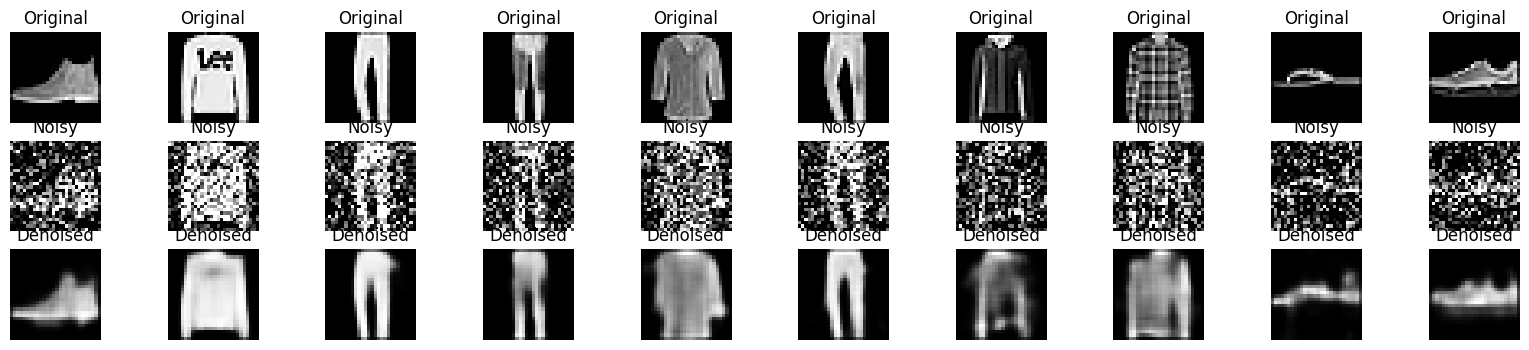

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Fashion MNIST Dataset
# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape data for the model (add a channel dimension)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

# Step 3: Build the Denoising Autoencoder Model
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

# Step 4: Compile and Train the Model
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model for 4 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=4, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Step 5: Denoise Test Images
denoised_images = autoencoder.predict(x_test_noisy)

# Step 6: Visualize Original, Noisy, and Denoised Images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display noisy input image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

plt.show()
